# Analalyse de la distribution du vocabulaire

## Imports et dépendances

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tdeganck\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer une une liste de stopwords

In [5]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

In [6]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

197 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', 'non'

## Tokeniser

In [7]:
# Récupération du contenu du fichier
path = "../data/all.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [8]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

29411 words found


In [9]:
words[:10]

['llUr', 'fili', 'ont', 'tiibi', '«', 'veeS', '£', 'U', 'section', 'nor']

## Calculer la taille du vocabulaire

In [10]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

9381 words kept (5682 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [11]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

[('rue', 74),
 ('août', 64),
 ('millions', 40),
 ('dem', 37),
 ('bruxelles', 33),
 ('ans', 32),
 ('esl', 32),
 ('prix', 31),
 ('chambre', 26),
 ('journal', 20)]

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

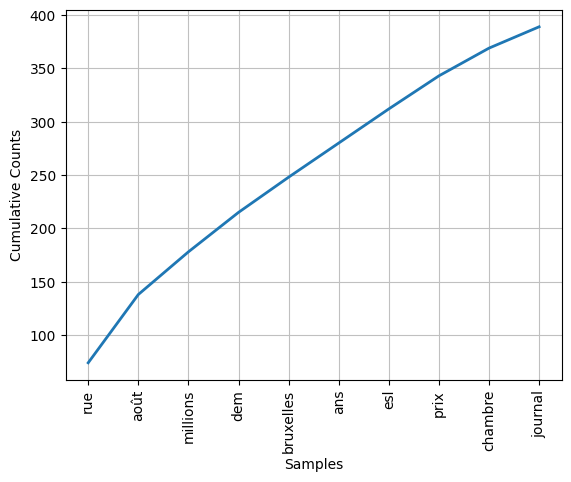

In [12]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [13]:
fdist.hapaxes()[:30]

['llur',
 'fili',
 'tiibi',
 'vees',
 'section',
 'iceés',
 'examen',
 'oour',
 'fowentiet',
 'diplcmo',
 'institairke',
 'frappé',
 'ràier',
 'distinction',
 'qal',
 'rnpraac',
 'élèves',
 'naedireettoart',
 'rores',
 'alureaes',
 'loa',
 'tenue',
 'urftita',
 'choea',
 'banale',
 'troo',
 'ïer',
 'one',
 'kaison',
 'tempe']

## Trouver les mots les plus longs du corpus

In [14]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

['éfofotahtatawtogmfen',
 'débanqueetdechange',
 'prêtshypothecaires',
 'pruvigeiremealavee',
 'eaoaaaaaiteltalsra',
 'fromentsétrangers',
 'qwaredarakreaafe',
 'aiiiioiicaiilaux',
 'avispropriétaire',
 'marchiezpremière',
 'lapluseiartequi',
 'daktresraaaévrs',
 'administrations',
 'courtraijntente',
 'couiiiutlkitltâ',
 'accomplissement',
 'irépantolrement',
 'principalaforce',
 'reconnaissantes',
 'complémentaires',
 'ancreanlimimnét',
 'créditanyersois',
 'plusexaclement',
 'renseignements',
 'intermédiaires',
 'provlaotremenl',
 'cbacossionsatr',
 'yanlrerapoveei',
 'interpellation',
 'provisoirement']